## Additional Coding Task 

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=785126116b7a1a7345db7ad1827d8a52280bc9df002fb115ceb70d03d5058d8c
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [3]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [6]:
!ls

sample_data  X_train.txt	  y_test_low_snr.txt	y_train_low_snr.txt
X_test.txt   y_test_high_snr.txt  y_train_high_snr.txt


In [ ]:
# newline is new data point (N*1 or N*50 array)
# for X, space is the delimiter. (N*50 array)
# read all the .txt files into numpy array, default delimiter for np.loadtxt() is whitespace.

In [16]:
x_train = np.loadtxt("X_train.txt", skiprows=1)
print(x_train.shape)

x_test = np.loadtxt("X_test.txt", skiprows=1)
print(x_test.shape)

y_test_highSNR = np.loadtxt("y_test_high_snr.txt", skiprows=1)
print(y_test_highSNR.shape)

y_test_lowSNR = np.loadtxt("y_test_low_snr.txt", skiprows=1)
print(y_test_lowSNR.shape)

y_train_highSNR = np.loadtxt("y_train_high_snr.txt", skiprows=1)
print(y_train_highSNR.shape)

y_train_lowSNR = np.loadtxt("y_train_low_snr.txt", skiprows=1)
print(y_train_lowSNR.shape)

(200, 50)
(300, 50)
(300,)
(300,)
(200,)
(200,)


## Random Forest Regressor

In [25]:
mse_rf_lowsnr = []
for m in range(x_train.shape[1]):
  # fit model
  rf = RF(max_features=m+1, random_state=0)
  rf.fit(x_train, y_train_lowSNR)
  # prediction
  y_preds = rf.predict(x_test)
  mse = np.mean((y_test_lowSNR - y_preds)**2)
  mse_rf_lowsnr.append(mse)

Text(0, 0.5, 'MSE')

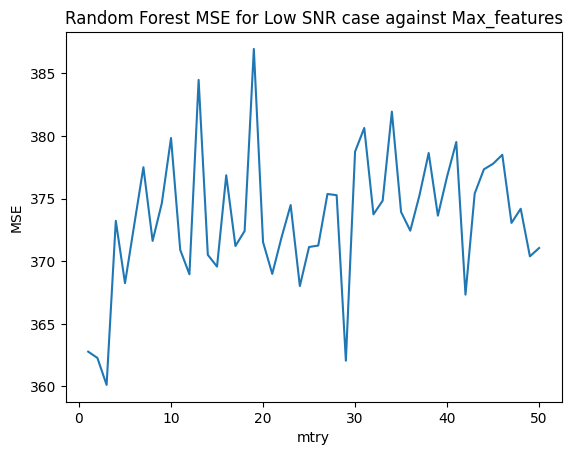

In [37]:
fig, ax = subplots()
x = np.arange(1, x_train.shape[1]+1)
ax.plot(x, mse_rf_lowsnr)
ax.set_title('Random Forest MSE for Low SNR case against Max_features')
ax.set_xlabel('mtry')
ax.set_ylabel('MSE')

In [26]:
mse_rf_highsnr = []
for m in range(x_train.shape[1]):
  # fit model
  rf = RF(max_features=m+1, random_state=0)
  rf.fit(x_train, y_train_highSNR)
  # prediction
  y_preds = rf.predict(x_test)
  mse = np.mean((y_test_highSNR - y_preds)**2)
  mse_rf_highsnr.append(mse)

Text(0, 0.5, 'MSE')

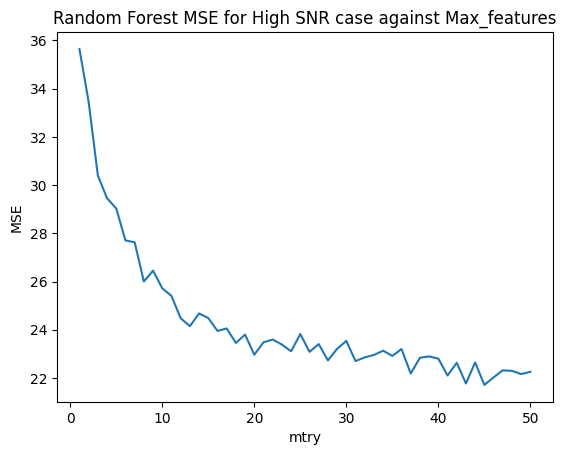

In [38]:
fig, ax = subplots()
x = np.arange(1, x_train.shape[1]+1)
ax.plot(x, mse_rf_highsnr)
ax.set_title('Random Forest MSE for High SNR case against Max_features')
ax.set_xlabel('mtry')
ax.set_ylabel('MSE')

## Gradient Boosting

In [42]:
mse_gbr_lowsnr = []
lr = 0.015
for i in range(x_train.shape[1]):
  gbr = GBR(n_estimators=1000, # default = 100
  learning_rate=lr*i,
  max_depth=3, # default = 3
  random_state=0)
  gbr.fit(x_train, y_train_lowSNR)

  y_preds = gbr.predict(x_test);
  mse = np.mean((y_test_lowSNR - y_preds)**2)
  mse_gbr_lowsnr.append(mse)

Text(0, 0.5, 'MSE')

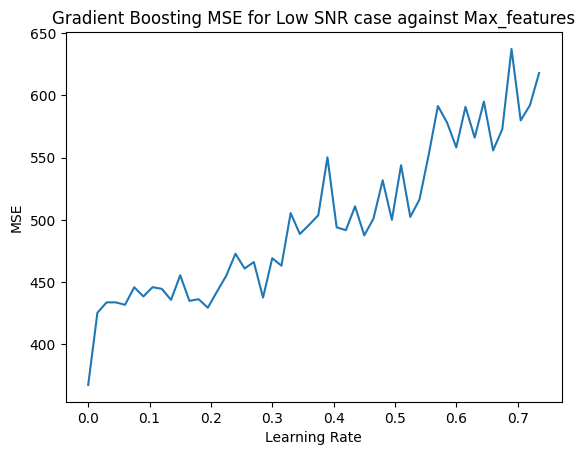

In [45]:
fig, ax = subplots()
x = np.arange(0, lr*(x_train.shape[1]), lr)
ax.plot(x, mse_gbr_lowsnr)
ax.set_title('Gradient Boosting MSE for Low SNR case against Max_features')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('MSE')

In [48]:
mse_gbr_highsnr = []
lr = 0.015
for i in range(x_train.shape[1]):
  gbr = GBR(n_estimators=1000, # default = 100
  learning_rate=lr*(i+1),
  max_depth=3, # default = 3
  random_state=0)
  gbr.fit(x_train, y_train_highSNR)

  y_preds = gbr.predict(x_test);
  mse = np.mean((y_test_highSNR - y_preds)**2)
  mse_gbr_highsnr.append(mse)

Text(0, 0.5, 'MSE')

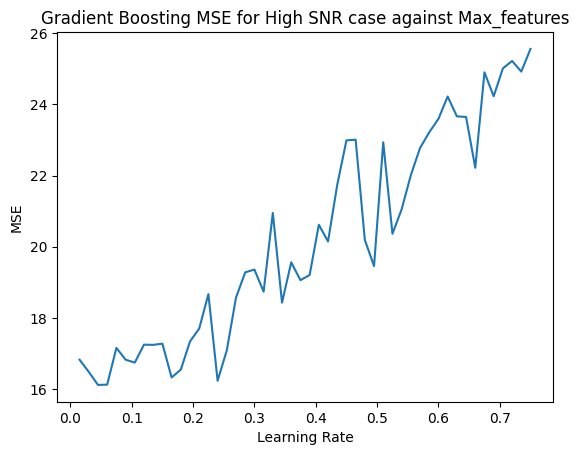

In [49]:
fig, ax = subplots()
x = np.arange(lr, lr*(x_train.shape[1]+1), lr)
ax.plot(x, mse_gbr_highsnr)
ax.set_title('Gradient Boosting MSE for High SNR case against Max_features')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('MSE')